In [580]:
import pandas as pd

In [581]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [582]:
# Cargar los datos
k2_df_raw = pd.read_csv('../../data/raw/k2pandc_2025.10.04_12.42.17.csv')

In [583]:
# Mostrar las primeras filas del DataFrame
k2_df_raw.head()

pl_name        hostname  default_flag disposition  \
0        BD+20 594 b       BD+20 594             0   CONFIRMED   
1        BD+20 594 b       BD+20 594             0   CONFIRMED   
2        BD+20 594 b       BD+20 594             1   CONFIRMED   
3  EPIC 201111557.01  EPIC 201111557             1   CANDIDATE   
4  EPIC 201111557.01  EPIC 201111557             0   CANDIDATE   

             disp_refname  sy_snum  sy_pnum discoverymethod  disc_year  \
0    Espinoza et al. 2016        1        1         Transit       2016   
1    Espinoza et al. 2016        1        1         Transit       2016   
2    Espinoza et al. 2016        1        1         Transit       2016   
3  Livingston et al. 2018        1        0         Transit       2018   
4  Livingston et al. 2018        1        0         Transit       2018   

  disc_facility              soltype  pl_controv_flag  \
0            K2  Published Confirmed                0   
1            K2  Published Confirmed                0   
2            K2  Published Confirmed                0   
3            K2  Published Candidate                0   
4            K2  Published Candidate                0   

                                          pl_refname  pl_orbper  \
0  <a refstr=MAYO_ET_AL__2018 href=https://ui.ads...  41.688644   
1  <a refstr=ESPINOZA_ET_AL__2016 href=https://ui...  41.685500   
2  <a refstr=STASSUN_ET_AL__2017 href=https://ui....  41.685500   
3  <a refstr=LIVINGSTON_ET_AL__2018 href=https://...   2.301830   
4  <a refstr=MAYO_ET_AL__2018 href=https://ui.ads...   2.302368   

   pl_orbpererr1  pl_orbpererr2  pl_orbperlim  pl_orbsmax  pl_orbsmaxerr1  \
0       0.003353      -0.003419           0.0         NaN             NaN   
1       0.003000      -0.003100           0.0       0.241           0.019   
2       0.003000      -0.003000           0.0         NaN             NaN   
3       0.000280      -0.000300           0.0         NaN             NaN   
4       0.000105      -0.000103           0.0         NaN             NaN   

   pl_orbsmaxerr2  pl_orbsmaxlim   pl_rade  pl_radeerr1  pl_radeerr2  \
0             NaN            NaN  2.355454     0.310000    -0.166773   
1          -0.017            0.0  2.230000     0.140000    -0.110000   
2             NaN            NaN  2.578070     0.112090    -0.112090   
3             NaN            NaN  1.120000     0.110000    -0.080000   
4             NaN            NaN  1.312588     0.524177    -0.120814   

   pl_radelim   pl_radj  pl_radjerr1  pl_radjerr2  pl_radjlim  pl_bmasse  \
0         0.0  0.210139     0.027656    -0.014878         0.0        NaN   
1         0.0  0.198947     0.012490    -0.009814         0.0    16.3000   
2         0.0  0.230000     0.010000    -0.010000         0.0    22.2481   
3         0.0  0.099900     0.009800    -0.007000         0.0        NaN   
4         0.0  0.120000     0.050000    -0.010000         0.0        NaN   

   pl_bmasseerr1  pl_bmasseerr2  pl_bmasselim  pl_bmassj  pl_bmassjerr1  \
0            NaN            NaN           NaN        NaN            NaN   
1         6.0000        -6.1000           0.0   0.051285       0.018878   
2         9.5349        -9.5349           0.0   0.070000       0.030000   
3            NaN            NaN           NaN        NaN            NaN   
4            NaN            NaN           NaN        NaN            NaN   

   pl_bmassjerr2  pl_bmassjlim pl_bmassprov  pl_orbeccen  pl_orbeccenerr1  \
0            NaN           NaN          NaN          NaN              NaN   
1      -0.019193           0.0         Mass          0.0              NaN   
2      -0.030000           0.0         Mass          0.0              NaN   
3            NaN           NaN          NaN          NaN              NaN   
4            NaN           NaN          NaN          NaN              NaN   

   pl_orbeccenerr2  pl_orbeccenlim  pl_insol  pl_insolerr1  pl_insolerr2  \
0              NaN             NaN       NaN           NaN           NaN   
1     

In [584]:
k2_df_raw.shape

(4004, 94)

In [585]:
#Mostrar información del DataFrame
k2_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 94 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4004 non-null   object 
 1   hostname         4004 non-null   object 
 2   default_flag     4004 non-null   int64  
 3   disposition      4004 non-null   object 
 4   disp_refname     4004 non-null   object 
 5   sy_snum          4004 non-null   int64  
 6   sy_pnum          4004 non-null   int64  
 7   discoverymethod  4004 non-null   object 
 8   disc_year        4004 non-null   int64  
 9   disc_facility    4004 non-null   object 
 10  soltype          4004 non-null   object 
 11  pl_controv_flag  4004 non-null   int64  
 12  pl_refname       4004 non-null   object 
 13  pl_orbper        3960 non-null   float64
 14  pl_orbpererr1    3071 non-null   float64
 15  pl_orbpererr2    3071 non-null   float64
 16  pl_orbperlim     3960 non-null   float64
 17  pl_orbsmax    

In [586]:
# Definir el target
target = 'disposition'

# Eliminar columnas con más del 50% de valores nulos
umbral_nulos = 0.5
limite_col = int(k2_df_raw.shape[0] * umbral_nulos)
k2_df_clean = k2_df_raw.loc[:, k2_df_raw.isnull().sum() <= limite_col]

# Eliminar filas donde el target esté nulo
k2_df_clean = k2_df_clean[k2_df_clean[target].notnull()]

# Opcional: eliminar filas con nulos en otras columnas (puedes ajustar el umbral)
k2_df_clean = k2_df_clean.dropna()

k2_df_clean.shape

(1224, 61)

In [587]:
k2_df_clean.isnull().sum()    

pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [588]:
k2_df_clean.shape

(1224, 61)

In [589]:
k2_df_clean.isnull().sum()

pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [590]:
k2_df_clean.shape

(1224, 61)

In [591]:
k2_df_clean.isnull().sum()



pl_name            0
hostname           0
default_flag       0
disposition        0
disp_refname       0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
soltype            0
pl_controv_flag    0
pl_refname         0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_radj            0
pl_radjerr1        0
pl_radjerr2        0
pl_radjlim         0
ttv_flag           0
st_refname         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_rad             0
st_raderr1         0
st_raderr2         0
st_radlim          0
st_mass            0
st_masslim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
sy_refname         0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_disterr1  

In [592]:
# Remove columns that are completely empty (all values are NaN)
k2_df_clean = k2_df_clean.dropna(axis=1, how='all')

# Remove rows that are completely empty (all values are NaN)
k2_df_clean = k2_df_clean.dropna(axis=0, how='all')

k2_df_clean.shape

(1224, 61)

In [593]:
k2_df_clean.shape

(1224, 61)

In [594]:
k2_df_clean = k2_df_clean.loc[:, k2_df_clean.nunique() > 1]
k2_df_clean

pl_name        hostname  default_flag     disposition  \
0           BD+20 594 b       BD+20 594             0       CONFIRMED   
1           BD+20 594 b       BD+20 594             0       CONFIRMED   
2           BD+20 594 b       BD+20 594             1       CONFIRMED   
3     EPIC 201111557.01  EPIC 201111557             1       CANDIDATE   
7     EPIC 201127519.01  EPIC 201127519             1       CANDIDATE   
11    EPIC 201164625.01  EPIC 201164625             1       CANDIDATE   
16    EPIC 201180665.01  EPIC 201180665             1       CANDIDATE   
50    EPIC 201352100.01  EPIC 201352100             1       CANDIDATE   
55    EPIC 201392505.01  EPIC 201392505             1       CANDIDATE   
62    EPIC 201456770.01  EPIC 201456770             1       CANDIDATE   
80    EPIC 201541160.01  EPIC 201541160             1       CANDIDATE   
100    EPIC 201595106 b  EPIC 201595106             1       CONFIRMED   
101    EPIC 201595106 b  EPIC 201595106             0       CONFIRMED   
110   EPIC 201617985.01  EPIC 201617985             0       CANDIDATE   
121   EPIC 201639576.01  EPIC 201639576             1       CANDIDATE   
128   EPIC 201663879.02          K2-319             1       CANDIDATE   
138   EPIC 201717274.01  EPIC 201717274             0       CANDIDATE   
162    EPIC 201841433 b  EPIC 201841433             1       CONFIRMED   
399   EPIC 205943325.01  EPIC 205943325             1       CANDIDATE   
420   EPIC 205979483.01  EPIC 205979483             1  FALSE POSITIVE   
510   EPIC 206312951.01  EPIC 206312951             1       CANDIDATE   
516    EPIC 206317286 c  EPIC 206317286             1       CONFIRMED   
530   EPIC 206461841.01  EPIC 206461841             1       CANDIDATE   
531   EPIC 206468053.01  EPIC 206468053             1       CANDIDATE   
560   EPIC 210418253.01  EPIC 210418253             1       CANDIDATE   
577   EPIC 210564155.01  EPIC 210564155             0       CANDIDATE   
605   EPIC 210706310.01  EPIC 210706310             1       CANDIDATE   
606   EPIC 210708830.01  EPIC 210708830             1       CANDIDATE   
636   EPIC 210945680.01  EPIC 210945680             1       CANDIDATE   
637   EPIC 210945680.01  EPIC 210945680             0       CANDIDATE   
648   EPIC 210967369.01  EPIC 210967369             1       CANDIDATE   
668   EPIC 211305568.01  EPIC 211305568             1       CANDIDATE   
669   EPIC 211305568.02  EPIC 211305568             1       CANDIDATE   
672   EPIC 211309648.01  EPIC 211309648             1       CANDIDATE   
673   EPIC 211309648.01  EPIC 211309648             0       CANDIDATE   
678   EPIC 211321953.01  EPIC 211321953             1       CANDIDATE   
684   EPIC 211336288.01  EPIC 211336288             1       CANDIDATE   
692   EPIC 211357309.01  EPIC 211357309             0       CANDIDATE   
701   EPIC 211393988.01  EPIC 211393988             0       CANDIDATE   
702   EPIC 211393988.01  EPIC 211393988             1       CANDIDATE   
704   EPIC 211396431.01  EPIC 211396431             1       CANDIDATE   
711   EPIC 211408558.01  EPIC 211408558             1       CANDIDATE   
741   EPIC 211436313.01  EPIC 211436313             1       CANDIDATE   
742   EPIC 211436876.01  EPIC 211436876             1       CANDIDATE   
743   EPIC 211438731.01  EPIC 211438731             1       CANDIDATE   
751   EPIC 211451776.01  EPIC 211451776             1       CANDIDATE   
767   EPIC 211506851.01  EPIC 211506851             1       CANDIDATE   
778   EPIC 211537087.02          K2-356             1       CANDIDATE   
830   EPIC 211644764.01  EPIC 211644764             1       CANDIDATE   
840   EPIC 211679060.01  EPIC 211679060             1       CANDIDATE   
846   EPIC 211705502.01  EPIC 211705502             0  FALSE POSITIVE   
849   EPIC 211711685.01  EPIC 211711685             1       CANDIDATE   
855   EPIC 211724246.01  EPIC 211724246             0       CANDIDATE   
856   EPIC 211724246.01  EPIC 211724246             1       CANDIDATE   
8

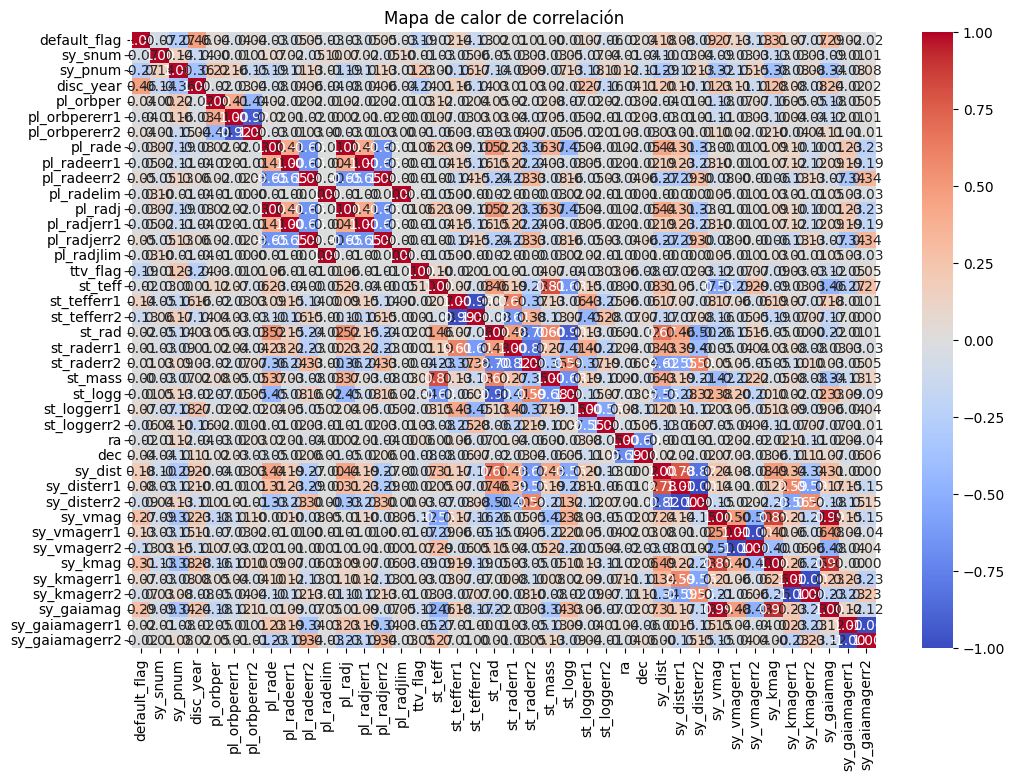

In [595]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr = k2_df_clean.corr(numeric_only=True)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()